In [1]:
import os, pickle, sys, gzip
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pymatgen.core import Element

sys.path.append('..')
from src.data import feature_to_composition, composition_to_feature
from src.utils import NEAR_ZERO, MetalElements, cosin_similarity, squared_error
viridis = mpl.cm.viridis
viridis.set_under([0.7, 0.7, 0.7])
blues = mpl.cm.Blues
blues.set_under([0.7, 0.7, 0.7])

- performance eval

In [7]:
ts = []
with open('../dump/time_torch_v1.pkl','rb') as f:
    ts.append(pickle.load(f))
with open('../dump/time_torch_v2.pkl','rb') as f:
    ts.append(pickle.load(f))
with open('../dump/time_torch_v2c.pkl','rb') as f:
    ts.append(pickle.load(f))
ts = np.array(ts).transpose(2,0,1)

(-0.3, 2.3)

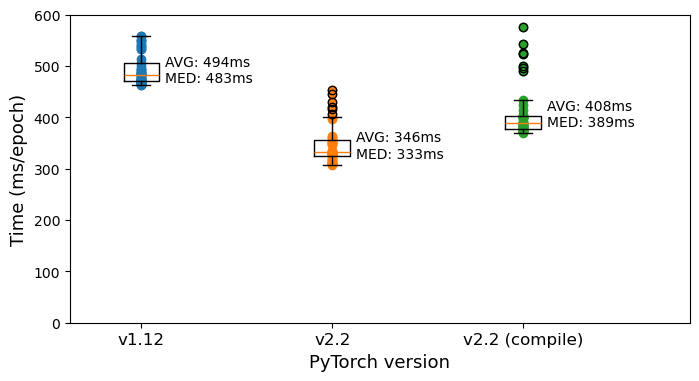

In [53]:
f, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(3):
    ax.scatter([i * 0.8]*49, ts[0,i][1:] * 1000)
    ax.boxplot(ts[0,i][1:] * 1000, positions=[i*0.8])
    avg = 1000 * ts[0,i][1:].mean()
    med = 1000 * np.median(ts[0,i][1:])
    ax.text(i * 0.8 + 0.1, avg-25, f'AVG: {avg:.0f}ms\nMED: {med:.0f}ms')
ax.set_ylabel('Time (ms/epoch)', fontsize=13)
ax.set_xlabel('PyTorch version', fontsize=13)
ax.set_xticks([0, 0.8, 1.6], ['v1.12','v2.2','v2.2 (compile)'], fontsize=12)
ax.set_ylim([0,600])
ax.set_xlim([-0.3, 2.3])

# Train Outputs

In [64]:
with gzip.open('../data/unique_data.pkl.gz','rb') as f:
    unique_data = pickle.load(f)
target_comp_vecs = np.vstack([composition_to_feature(data['target_comp']) for data in unique_data])

output_path = '/home/jhyang/WORKSPACES/MODELS/isyn/AE/'
os.listdir(output_path)

['train_unique_latent_32',
 'train_target_latent_04',
 'train_unique_cl1_latent_32',
 'train_target_latent_32',
 'train_unique_cl2_latent_24',
 'train_unique_cl1_latent_24',
 'train_unique_latent_16',
 'train_unique_latent_08',
 'train_unique_nn_latent_24',
 'train_unique_sl_latent_24',
 'train_unique_cl2_latent_32',
 'train_target_latent_16',
 'train_unique_latent_64',
 'train_target_latent_08']

In [145]:
#case = f'{5000:05d}'
case = 'best'
output_ldim = {}
for i in [8, 16, 32, 64]:
    fn = os.path.join(output_path, f'train_unique_latent_{i:02d}', f'{case}.output.test.pkl')
    with open(fn, 'rb') as f:
        out = pickle.load(f)
    output_ldim[i] = {
        'target': np.array([o[0] for o in out]),
        'pred': np.array([o[1] for o in out]),
        'latent': np.array([o[2] for o in out]),
    }

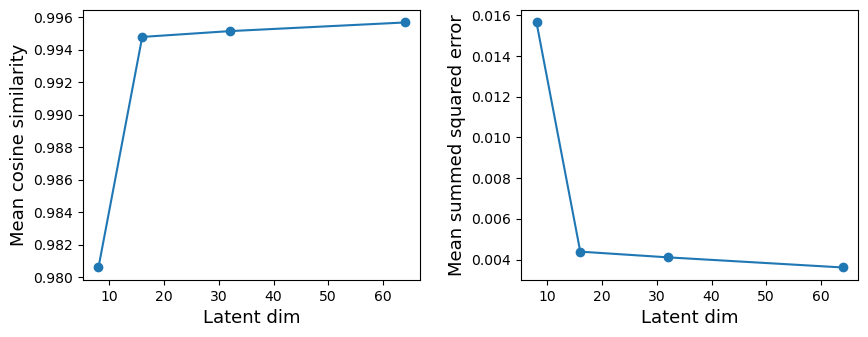

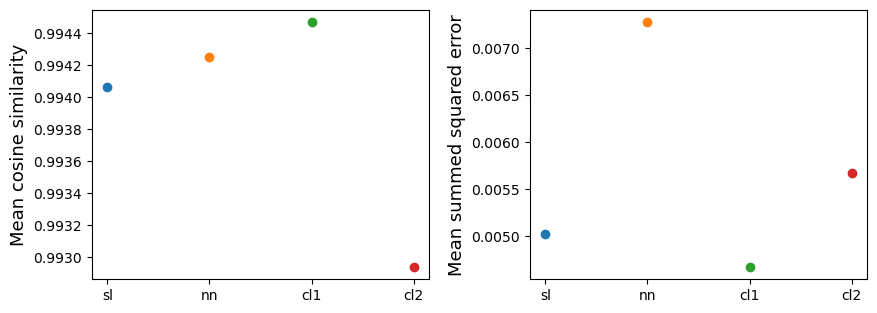

In [152]:
f, axs = plt.subplots(1,2,figsize=(10,3.5))
xs = []
ys = [[], []]
for x, output in output_ldim.items():
    xs.append(x)
    csim = cosin_similarity(output['target'], output['pred'], False)
    sqer = squared_error(output['target'], output['pred'], False)
    ys[0].append(csim.mean())
    ys[1].append(sqer.mean())
for ax, y in zip(axs, ys):
    ax.plot(xs, y, '-o')
    ax.set_xlabel('Latent dim', fontsize=13)
axs[0].set_ylabel('Mean cosine similarity', fontsize=13)
axs[1].set_ylabel('Mean summed squared error', fontsize=13)
f.subplots_adjust(wspace=0.3)


f, axs = plt.subplots(1,2,figsize=(10,3.5))
for x, output in output_lfn.items():
    csim = cosin_similarity(output['target'], output['pred'], False)
    sqer = squared_error(output['target'], output['pred'], False)
    axs[0].scatter(x, csim.mean())
    axs[1].scatter(x, sqer.mean())
#for ax, y in zip(axs, ys):
#    ax.plot(xs, y, '-o')
#    ax.set_xlabel('Latent dim', fontsize=13)
axs[0].set_ylabel('Mean cosine similarity', fontsize=13)
axs[1].set_ylabel('Mean summed squared error', fontsize=13)
f.subplots_adjust(wspace=0.3)


In [202]:
idxs = np.where(((target_comp_vecs < 1e-1) & (target_comp_vecs > 0)).sum(1) == 0)[0] - np.sum(np.array([d['year'] for d in unique_data]) < 2019)
idxs[idxs > 0]

array([   4,   13,   14,   57,  117,  118,  119,  120,  137,  138,  139,
        160,  212,  226,  287,  289,  323,  327,  353,  394,  436,  444,
        449,  450,  451,  452,  453,  454,  463,  467,  468,  469,  482,
        483,  487,  511,  512,  513,  523,  531,  539,  602,  603,  604,
        609,  664,  675,  700,  735,  736,  737,  738,  739,  794,  795,
        796,  811,  812,  813,  814,  842,  843,  844,  848,  868,  871,
        879,  880,  881,  882,  883,  884,  885,  899,  900,  901,  909,
        910,  911,  915,  919,  921,  922,  923,  924,  926,  927,  928,
        929,  930,  931,  932,  949,  952,  953,  955,  958,  964,  965,
        966,  972,  979,  980,  981,  982,  983,  984,  991,  992,  999,
       1002, 1003, 1015, 1016, 1031, 1032, 1033, 1035, 1036, 1037, 1038,
       1039, 1042, 1043, 1044, 1045, 1055, 1060, 1066, 1068, 1069, 1072,
       1075, 1076, 1078, 1082, 1084, 1086, 1091, 1092, 1093, 1094, 1095,
       1096, 1098, 1099, 1100, 1101, 1104, 1109, 11

In [206]:
j = 2419
n = 0
for out in output_ldim.values():
    sim_t = cosin_similarity(target_comp_vecs, out['target'][j], False)
    sim_p = cosin_similarity(target_comp_vecs, out['pred'][j], False)
    sqe_t = squared_error(target_comp_vecs, out['target'][j], False)
    sqe_p = squared_error(target_comp_vecs, out['pred'][j], False)
    i2sim = np.argsort(sim_p)[::-1]
    i2sqe = np.argsort(sqe_p)
#    print(np.argmax(sim_t), np.argmin(sqe_t))
#    print(i2sim[:5], i2sqe[:5])
    print(f'{np.argmax(sim_t):6d}',' '*7, ' '.join([f'{k}[{v:.4f}]' for k,v in sorted(unique_data[np.argmax(sim_t)]['target_comp'].items(), key=lambda x: x[1], reverse=True)]))
#    print(out['target'][j])
    print(' '*14, ' '.join([f'{k}[{v:.4f}]' for k,v in sorted(feature_to_composition(out['pred'][j]).items(), key=lambda x: x[1], reverse=True) if v > 1e-4]))
    if n > 0:
        print()
        for i in i2sqe[:n]:
            print(f'{i:6d}', f'{sqe_p[i]:.5f}', ' '.join([f'{k}[{v:.4f}]' for k,v in sorted(unique_data[i]['target_comp'].items(), key=lambda x: x[1], reverse=True)]))
        print()
        for i in i2sim[:n]:
            print(f'{i:6d}', f'{sim_p[i]:.5f}', ' '.join([f'{k}[{v:.4f}]' for k,v in sorted(unique_data[i]['target_comp'].items(), key=lambda x: x[1], reverse=True)]))
    print('='*50)
    #unique_data[i2]['target_comp'], {k:v for k,v in feature_to_composition(out['pred'][j]).items() if v > 0.01}


 28527         Ti[0.4000] Zr[0.2000] Nb[0.2000] Hf[0.1000] Ta[0.1000]
               Ti[0.8086] Nb[0.4662] Zr[0.2882] Hf[0.1523] F[0.0475] Ni[0.0342] V[0.0253] Am[0.0224] Pm[0.0161] He[0.0161] Ne[0.0142] Sn[0.0138] Ar[0.0134] Pa[0.0106] Bk[0.0101] Po[0.0097] Fm[0.0044] Ac[0.0041] Cm[0.0036] Mg[0.0033] Rn[0.0030] W[0.0028] Fr[0.0027] Cf[0.0026] Ir[0.0024] Tc[0.0018] Lr[0.0018] O[0.0017] Ra[0.0016] Re[0.0013] Rb[0.0012] Md[0.0011] No[0.0010] Xe[0.0010] Kr[0.0008] Es[0.0007] Li[0.0007] Zn[0.0007] At[0.0006] Os[0.0006] Cr[0.0005] H[0.0005] Ta[0.0005] Sc[0.0004] Cs[0.0004] C[0.0003] K[0.0002] Np[0.0002] Be[0.0001]
 28527         Ti[0.4000] Zr[0.2000] Nb[0.2000] Hf[0.1000] Ta[0.1000]
               Ti[0.7687] Zr[0.5203] Nb[0.3627] Ni[0.2077] Hf[0.0742] Mn[0.0082] Au[0.0076] B[0.0034] Cr[0.0021] Md[0.0020] Ne[0.0020] V[0.0019] Xe[0.0018] Rn[0.0018] Fr[0.0018] Ac[0.0018] Kr[0.0017] Bk[0.0017] Cf[0.0017] Po[0.0017] He[0.0017] At[0.0017] Cm[0.0017] Ra[0.0017] No[0.0017] Fm[0.0017] Es[0.0017] Pa[

In [139]:
#case = f'{5000:05d}'
case = 'best'
output_lfn = {}
for k in ['sl','nn','cl1','cl2']:
    fn = os.path.join(output_path, f'train_unique_{k}_latent_24', f'{case}.output.test.pkl')
    with open(fn, 'rb') as f:
        output_lfn[k] = pickle.load(f)
with gzip.open('../data/unique_data.pkl.gz','rb') as f:
    unique_data = pickle.load(f)
target_comp_vecs = np.vstack([composition_to_feature(data['target_comp']) for data in unique_data])

In [141]:
j = 0
n = 4
for out in output_lfn.values():
    sim_t = cosin_similarity(target_comp_vecs, out['target'][j], False)
    sim_p = cosin_similarity(target_comp_vecs, out['pred'][j], False)
    sqe_t = squared_error(target_comp_vecs, out['target'][j], False)
    sqe_p = squared_error(target_comp_vecs, out['pred'][j], False)
    i2sim = np.argsort(sim_p)[::-1]
    i2sqe = np.argsort(sqe_p)
#    print(np.argmax(sim_t), np.argmin(sqe_t))
#    print(i2sim[:5], i2sqe[:5])
    print(f'{np.argmax(sim_t):6d}',' '*7, ' '.join([f'{k}[{v:.4f}]' for k,v in sorted(unique_data[np.argmax(sim_t)]['target_comp'].items(), key=lambda x: x[1], reverse=True)]))
    print(' '*14, ' '.join([f'{k}[{v:.4f}]' for k,v in sorted(feature_to_composition(out['pred'][j]).items(), key=lambda x: x[1], reverse=True) if v > 1e-3]))
    print()
    for i in i2sqe[:n]:
        print(f'{i:6d}', f'{sqe_p[i]:.5f}', ' '.join([f'{k}[{v:.4f}]' for k,v in sorted(unique_data[i]['target_comp'].items(), key=lambda x: x[1], reverse=True)]))
    print()
    for i in i2sim[:n]:
        print(f'{i:6d}', f'{sim_p[i]:.5f}', ' '.join([f'{k}[{v:.4f}]' for k,v in sorted(unique_data[i]['target_comp'].items(), key=lambda x: x[1], reverse=True)]))
    print('='*50)
    #unique_data[i2]['target_comp'], {k:v for k,v in feature_to_composition(out['pred'][j]).items() if v > 0.01}


 26108         Te[0.5115] Ag[0.2558] Ga[0.2327]
               Te[0.9998] Ga[0.5568] Ag[0.4650] Ge[0.0352] Sr[0.0326] Se[0.0297] Pd[0.0178] Sb[0.0116] O[0.0087] Bi[0.0078] Pt[0.0065] C[0.0061] S[0.0040] In[0.0033] Y[0.0026] Sm[0.0025] Dy[0.0016] Br[0.0012]

 16618 0.00209 Te[0.5000] Ga[0.2500] Ag[0.2500]
 26108 0.00374 Te[0.5115] Ag[0.2558] Ga[0.2327]
 14526 0.07349 Te[0.5556] Ga[0.3333] Cu[0.1111]
 13284 0.07984 Te[0.6000] Ga[0.4000]

 16618 0.99729 Te[0.5000] Ga[0.2500] Ag[0.2500]
 26108 0.99511 Te[0.5115] Ag[0.2558] Ga[0.2327]
 13284 0.92231 Te[0.6000] Ga[0.4000]
 14526 0.91147 Te[0.5556] Ga[0.3333] Cu[0.1111]
 26108         Te[0.5115] Ag[0.2558] Ga[0.2327]
               Te[0.4573] Ag[0.2638] Ga[0.2432] O[0.0036] Mg[0.0021] Br[0.0020] Mn[0.0016]

 16618 0.00209 Te[0.5000] Ga[0.2500] Ag[0.2500]
 26108 0.00314 Te[0.5115] Ag[0.2558] Ga[0.2327]
 14572 0.09237 Te[0.5000] Ag[0.2500] In[0.1250] Sb[0.1250]
 14571 0.09361 Te[0.5000] Ag[0.2500] Sb[0.1500] In[0.1000]

 16618 0.99843 Te[0.5000

In [117]:
def to_numpy(vector):
    if isinstance(vector, torch.Tensor):
        return vector.cpu().numpy()
    else:
        return np.array(vector)

def mean_squared_error(mat1, mat2):
    x = to_numpy(mat1)
    y = to_numpy(mat2)
    return np.mean(np.sqrt(np.sum(np.square(x - y), -1)))

def cosin_similarity(mat1, mat2):
    x = to_numpy(mat1)
    y = to_numpy(mat2)
    x = x / np.sqrt(np.sum(np.square(x), -1, keepdims=True))
    y = y / np.sqrt(np.sum(np.square(y), -1, keepdims=True))
    return np.sum(x * y, -1)

(1.724744871391589, 1.724744871391589)

In [77]:
import torch
a, b = torch.rand((2, 10, 4))
torch.sum(a * b, 1) / (torch.sqrt(torch.sum(torch.square(a), 1)) * torch.sqrt(torch.sum(torch.square(b), 1)))


tensor([0.8268, 0.8232, 0.8354, 0.9366, 0.8701, 0.7955, 0.8879, 0.8497, 0.9148,
        0.8268])

In [38]:
np.sqrt(np.sum(np.square(target_comp_vecs), 1)), np.sqrt(np.sum(np.square(output['target'][j])))

(array([0.63950074, 0.63942736, 0.6846532 , ..., 0.64375305, 0.6324555 ,
        0.57749474], dtype=float32),
 0.60877335)

In [5]:
from sklearn.manifold import TSNE
tsne = TSNE()
tvecs = {l:tsne.fit_transform(output[l]['latent']) for l in ldims}

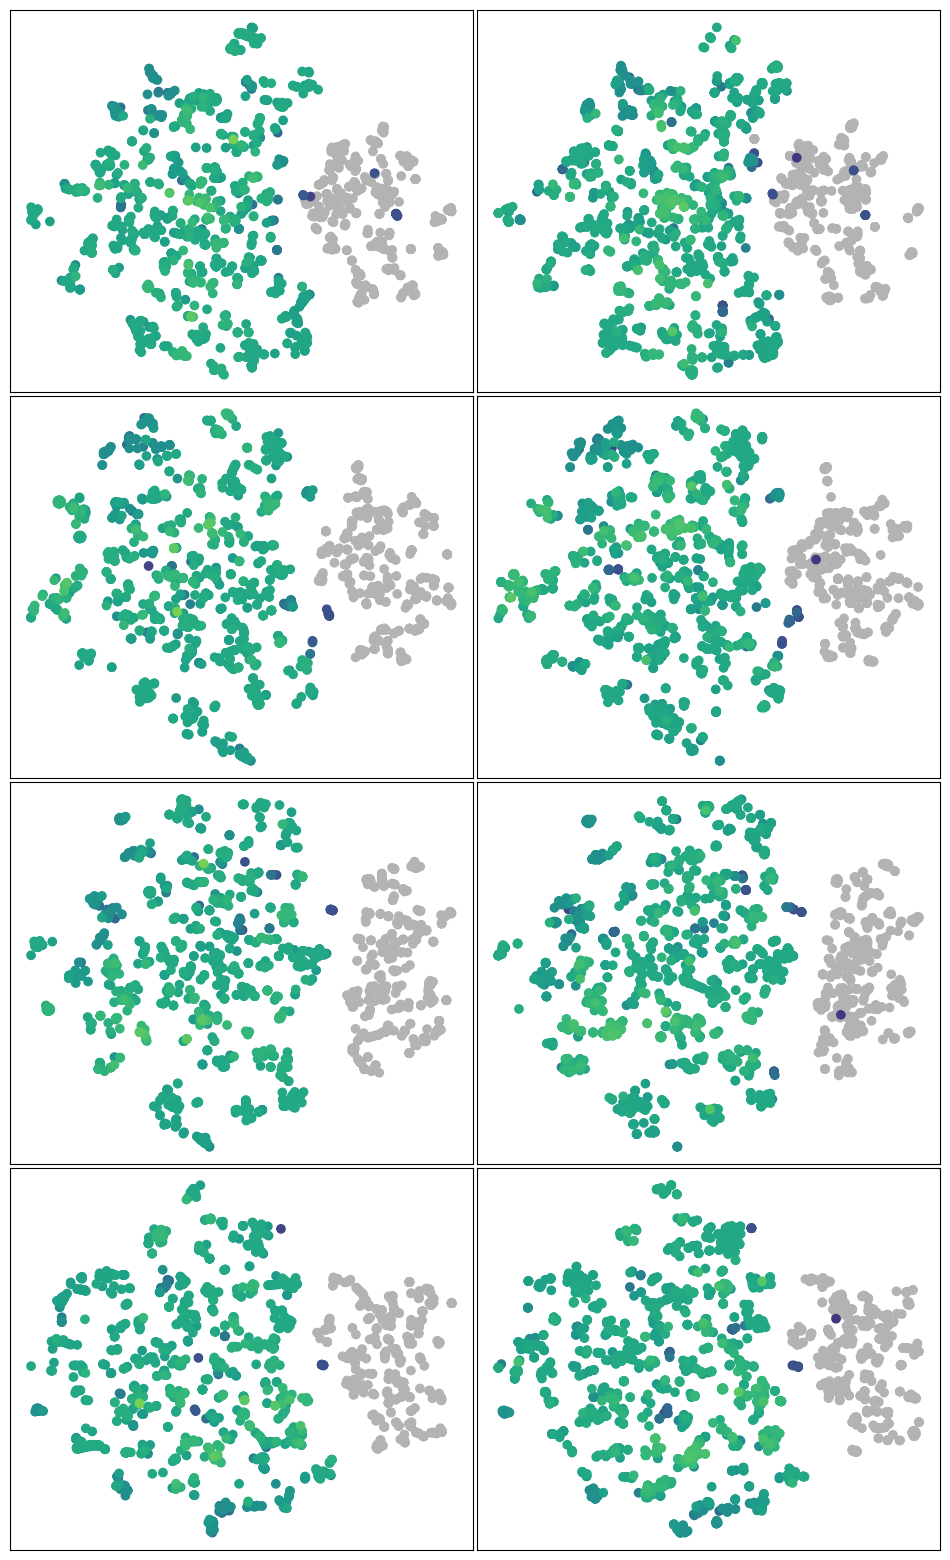

In [9]:
f, axs = plt.subplots(4,2,figsize=(12,20))
c = output['target'].T[Element('O').number]
#c = np.sum(target != 0, 0)
o = np.argsort(c)
o_valid = o[o < i_valid]
o_test = o[o >= i_valid]
for l, ax in zip([8,16,32,64], axs):
    ax[0].scatter(*tvecs[l][o_valid].T, c=c[o_valid], vmin=NEAR_ZERO, vmax=1, cmap=cmap)
    ax[1].scatter(*tvecs[l][o_test].T, c=c[o_test], vmin=NEAR_ZERO, vmax=1, cmap=cmap)
    for _ax in ax:
        _ax.set_xticks([])
        _ax.set_yticks([])
f.subplots_adjust(wspace=0.01, hspace=0.01)

In [75]:
{k:v for k,v in sorted(feature_to_composition((target > 0).sum(1)).items(), key=lambda x:x[1], reverse=True)}

{'O': 3502,
 'Ti': 1044,
 'Fe': 670,
 'Ba': 609,
 'Sr': 588,
 'Al': 550,
 'Bi': 525,
 'Ca': 519,
 'La': 502,
 'Li': 497,
 'Nb': 482,
 'Mn': 430,
 'Na': 412,
 'Zn': 355,
 'Co': 352,
 'Si': 351,
 'Zr': 345,
 'Mg': 337,
 'Y': 314,
 'Cu': 309,
 'Te': 260,
 'Ni': 257,
 'Sb': 214,
 'Sn': 197,
 'Ga': 195,
 'Ge': 184,
 'Ce': 173,
 'Ta': 170,
 'Mo': 167,
 'Cr': 154,
 'S': 146,
 'V': 144,
 'Eu': 144,
 'Pb': 135,
 'Se': 132,
 'P': 127,
 'W': 127,
 'Sm': 118,
 'Nd': 105,
 'Gd': 95,
 'B': 91,
 'In': 89,
 'Sc': 84,
 'Ag': 67,
 'Lu': 63,
 'Yb': 58,
 'Er': 56,
 'Cl': 55,
 'Pr': 54,
 'Ru': 52,
 'Tb': 48,
 'C': 47,
 'Dy': 47,
 'Ho': 38,
 'F': 37,
 'N': 30,
 'Cd': 29,
 'Cs': 29,
 'Hf': 27,
 'I': 26,
 'H': 19,
 'Pd': 19,
 'Ir': 17,
 'Br': 15,
 'Tm': 15,
 'Re': 13,
 'Rb': 11,
 'As': 10,
 'Pt': 9,
 'Rh': 7,
 'Be': 6,
 'Tl': 6,
 'K': 5,
 'Os': 5,
 'U': 4,
 'Au': 3}

In [5]:
for label in ['train_unique_latent_08', 'train_unique_nn_latent_08']:
    i_valid = output[label]['i']
    sim = np.sum(output[label]['pred'] * output[label]['target'], 1)
    print(label, np.mean(sim[:i_valid]), np.mean(sim[i_valid:]))

train_unique_latent_08 0.42372465 0.42808983
train_unique_nn_latent_08 0.41841874 0.4218191
